# Time analysis
---

In [2]:
##importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("dataset\\data01_direction4priors.csv") ##open file

In [4]:
subject_id = 6
data_subject = data.loc[data['subject_id'] == subject_id]

#### Making ranges from reaction time column

I'will take the *reaction_time* and make a new column with *ranges* of reaction time using $0.1$ sec steps.

In [36]:
ranges = np.arange(0,data_subject.loc[:,"reaction_time"].max(),0.1).round(2)
# print(ranges)
data_subject.loc[:,"reaction_time_range"] = pd.cut(data_subject.loc[:,"reaction_time"], bins=ranges, labels=False)+1
if data_subject.loc[:,'reaction_time_range'].isnull().sum() > 0: ##deleting rows with NaN values
    data_subject = data_subject.dropna(subset=['reaction_time_range'])
indexes = data_subject.loc[:,'reaction_time_range'].value_counts().sort_index().index.astype(int) #get the sorted index
x_labels = np.round(ranges[indexes],1) #filtering the range values using the sorted indexes
##add a reaction_time_range_label column to the data_subject dataframe using the x_labels. Loop through the reaction_time_range column and get the corresponding x_labels value
data_subject.loc[:,"reaction_time_range_label"] = data_subject.loc[:,"reaction_time_range"].apply(lambda x: ranges[int(x)] if x < len(ranges) else 0)

#### Getting estimated angles from $x$ and $y$ coordinates

In [6]:
from utils import getAngles
x = data_subject['estimate_x'].values
y = data_subject['estimate_y'].values
##using estimate_x and estimate_y to calculate the angle
data_subject.loc[:,'estimate_angles'] = np.round(getAngles(x, y), 3)
##limit the angles between 0 and 359 using %360
data_subject.loc[:,'estimate_angles'] = data_subject['estimate_angles'] % 360
data_subject.loc[:,'diff_angles'] = data_subject['motion_direction'] - data_subject['estimate_angles']
data_subject.loc[:,'diff_angles'].describe()

count    7552.000000
mean        9.942208
std        67.727010
min      -354.278000
25%       -18.125000
50%         1.501000
75%        22.630000
max       353.722000
Name: diff_angles, dtype: float64

In [7]:
data_subject.columns
data_subject[["reaction_time","raw_response_time"]].describe()

,reaction_time,raw_response_time
count,7552.000000,7552.000000
mean,1.332870,311.928587
std,0.358838,180.000676
min,0.226008,2.154724
25%,1.051085,156.559424
50%,1.274957,311.912491
75%,1.557375,465.591767
max,2.957214,695.325845


In [8]:
data_subject.loc[:,'delta_raw_reaction_time'] = data_subject['raw_response_time'] - data_subject['raw_response_time'].shift(1)
data_subject.loc[:,'delta_reaction_time'] = data_subject['reaction_time'] - data_subject['reaction_time'].shift(1)

data_subject[["delta_reaction_time","delta_raw_reaction_time"]].describe()

,delta_reaction_time,delta_raw_reaction_time
count,7551.000000,7551.000000
mean,0.000043,0.084944
std,0.476019,41.271925
min,-1.856677,-692.768143
25%,-0.301005,2.568049
50%,-0.007879,2.792058
75%,0.302184,3.079873
max,1.842256,7.520062


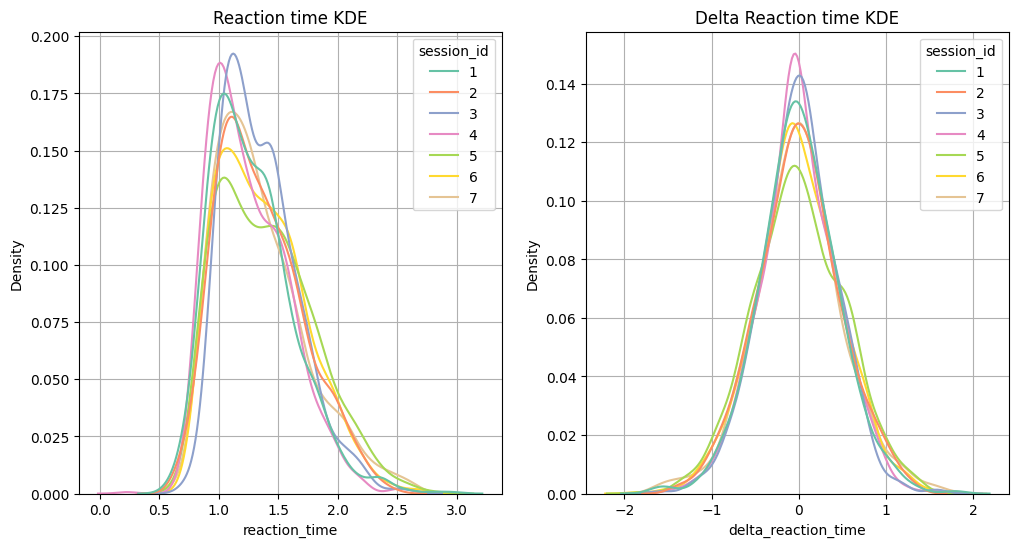

In [24]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
sns.kdeplot(data_subject,x="reaction_time",ax=axs[0],hue="session_id",palette="Set2",)
sns.kdeplot(data_subject,x="delta_reaction_time",ax=axs[1],hue="session_id",palette="Set2")
axs[0].set_title("Reaction time KDE")
axs[1].set_title("Delta Reaction time KDE")
axs[0].grid()
axs[1].grid()
plt.show()

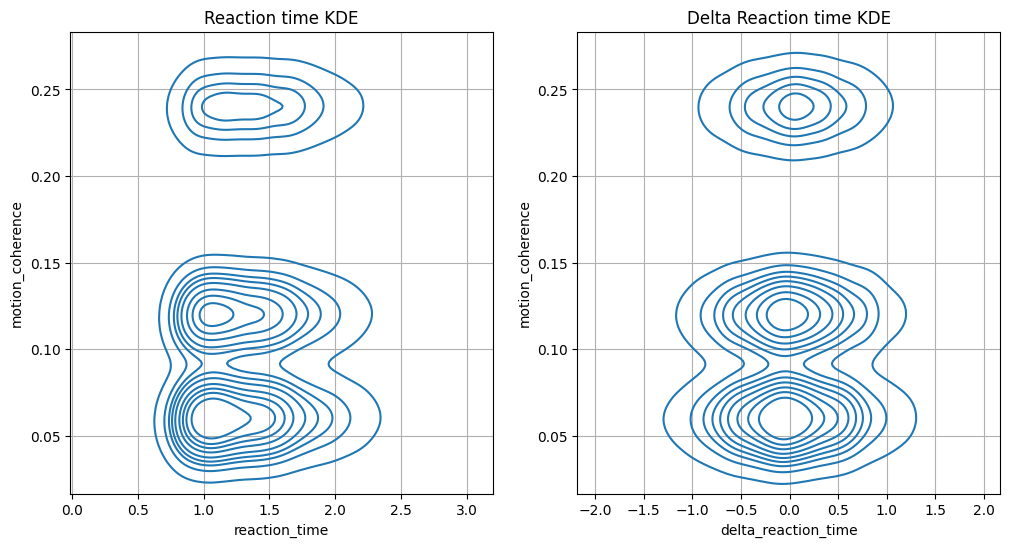

In [33]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
sns.kdeplot(data_subject,x="reaction_time",y="motion_coherence",ax=axs[0])
sns.kdeplot(data_subject,x="delta_reaction_time",y="motion_coherence",ax=axs[1])
axs[0].set_title("Reaction time KDE")
axs[1].set_title("Delta Reaction time KDE")
axs[0].grid()
axs[1].grid()
plt.show()